In [1]:
import sys
sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

In [116]:
data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))

# data normalization
data = data -  np.mean(data, axis=0)
data /= np.std(data)

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], 4, sigma=1., learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.pca_weights_init(data)
som.train_batch(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.1767152368528517
 topographic error: 0.0


In [117]:
winnder_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winnder_coordinates, som_shape)

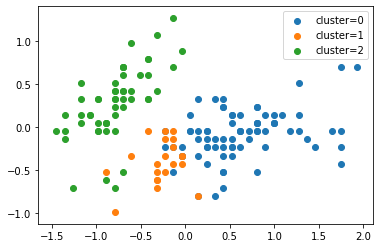

In [118]:
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c,1], label='cluster='+str(c))
plt.legend()